# Graph - Cycle Detection

---

In [ ]:
from importnb import Notebook

from theoria.validor import TestCase, Validor

with Notebook():
    from notebooks.computer_science.algorithms.graphs.__basic__representation import (
        AdjacencyListDirectedGraph,
        GraphNode,
    )

## Examples

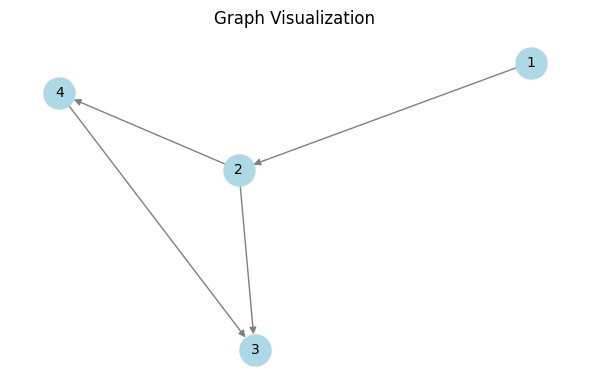

In [ ]:
misleading_g = AdjacencyListDirectedGraph(
    {
        GraphNode(1): [GraphNode(2)],
        GraphNode(2): [GraphNode(3), GraphNode(4)],
        GraphNode(3): [],
        GraphNode(4): [GraphNode(3)],
    }
)

if __name__ == "__main__":
    # Note that this is NOT a cycle.
    # A naive implementation might think that simply because 3 is visited twice, there is a cycle.
    # However, we also have to consider the direction of the edges.
    misleading_g.visualise()

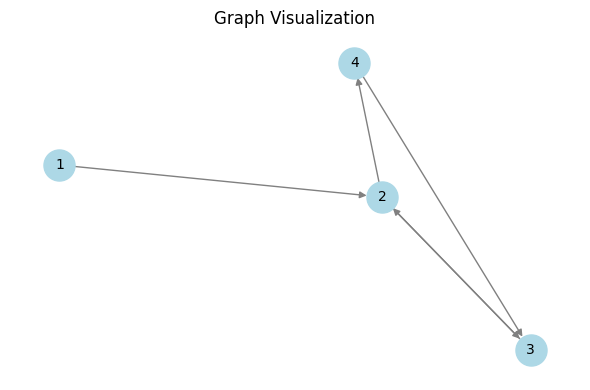

In [9]:
cycle_g = AdjacencyListDirectedGraph(
    {
        GraphNode(1): [GraphNode(2)],
        GraphNode(2): [GraphNode(3), GraphNode(4)],
        GraphNode(3): [GraphNode(2)],  # Back edge creates a cycle
        GraphNode(4): [GraphNode(3)],
    }
)

if __name__ == "__main__":
    cycle_g.visualise()

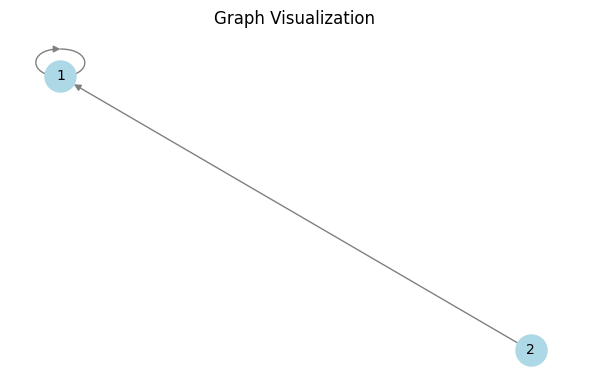

In [11]:
simple_cycle_g = AdjacencyListDirectedGraph(
    {
        GraphNode(1): [GraphNode(1)],
        GraphNode(2): [GraphNode(1)],
    }
)

if __name__ == "__main__":
    simple_cycle_g.visualise()

## Implementation

In [5]:
def has_cycle(graph: AdjacencyListDirectedGraph, start_node: GraphNode) -> bool:
    visited = set()

    # This is the real addition - the current recursion stack
    rec_stack = set()

    def dfs(node: GraphNode) -> bool:
        visited.add(node)
        rec_stack.add(node)

        for neighbor in graph.adjacency_list.get(node, []):
            if neighbor not in visited:
                if dfs(neighbor):
                    return True
            elif neighbor in rec_stack:
                # Back edge to current path -> CYCLE!
                return True

        # Finished this branch
        rec_stack.remove(node)
        return False

    return dfs(start_node)

In [12]:
test_cases = [
    TestCase(
        input_data={"graph": misleading_g, "start_node": GraphNode(1)},
        expected_output=False,
        description="Revisited vertex without a cycle",
    ),
    TestCase(
        input_data={"graph": cycle_g, "start_node": GraphNode(1)},
        expected_output=True,
        description="Multiple nodes with a cycle",
    ),
    TestCase(
        input_data={"graph": simple_cycle_g, "start_node": GraphNode(1)},
        expected_output=True,
        description="Single node with a self-loop",
    ),
]

In [13]:
if __name__ == "__main__":
    Validor(has_cycle).add_cases(test_cases).run()

[2025-12-02 21:29:56,167] [INFO] All 3 tests passed for has_cycle.


## Complexity

Same as DFS, 
* Time: $O(V + E)$ - visits all vertices and outgoing edges once.
* Space: $O(V)$ - visited set and recursion stack. 